In [130]:
# ObaidUrRehman

In [131]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib.pyplot import pie, axis, show

In [132]:
hfd = pd.read_csv('hospitaldata.csv',thousands=',')
hfd.head()

,Date,id,Time,Age,Sex,Consulting..Doctor,Specialty,Procedure,Total..Charges,Amount..Received.,Amount..Balance,Amount.Received.By,Amount.in.Hospital,Receptionist..Name,Next.Apt
0,"Sunday, January 01, 2017",101,11:00AM,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN


# Q1. Remove the dots in the names.

In [133]:
hfd.columns = [col.replace('.','') for col in hfd.columns]
hfd.head()

,Date,id,Time,Age,Sex,ConsultingDoctor,Specialty,Procedure,TotalCharges,AmountReceived,AmountBalance,AmountReceivedBy,AmountinHospital,ReceptionistName,NextApt
0,"Sunday, January 01, 2017",101,11:00AM,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN


# Q2. Which day of the week is expected to have most visits?

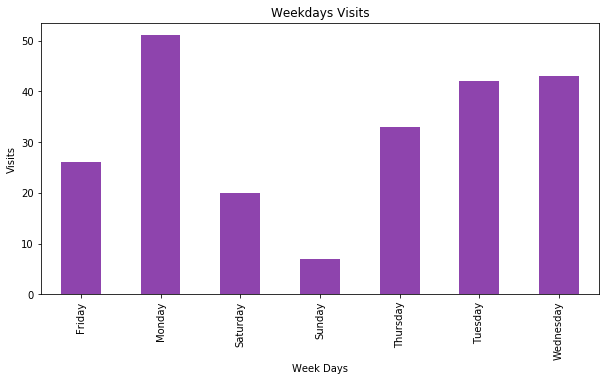

In [134]:
# So there are 0 Null values in Date column

weekday = pd.to_datetime(hfd['Date'])
hfd['WeekDay'] = weekday.dt.weekday_name  #Monday=0, Sunday=6
# grouping by weekday
DayData = hfd.groupby('WeekDay').WeekDay.count()
g1 = DayData.plot(kind='bar',figsize=(10, 5),color = '#8E44AD',title="Weekdays Visits") 
g1.set_xlabel('Week Days')
g1.set_ylabel('Visits')

#As we can see from plot, Monday has the most visits

# Q3. What is the average age of patients?

In [135]:
# There are grabage values e.g. "-", "6M". So we need to clean this column

# We can use mean(Age) to fill the garbage values, but because our dataset is too small, ill just replace them with nan

hfd['Age'] =pd.to_numeric(hfd.Age,errors='coerce')
mean = np.mean(hfd.Age) #Average age is 32.7
print "Mean Age is: "+str(mean)

Mean Age is: 32.734375


# Q4. How many children were entertained?

Number of childrens entertained:23


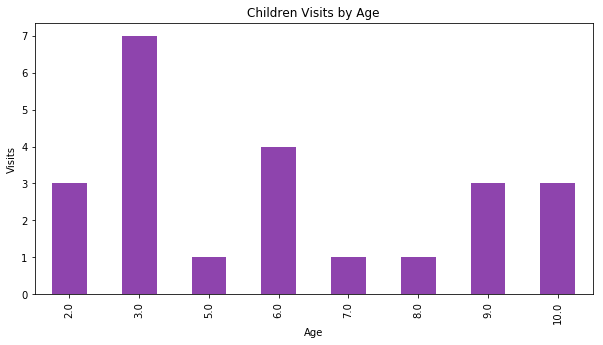

In [136]:
child = hfd[['Age']].copy()
child =child.loc[child['Age']<=12]
child = child.groupby('Age').Age.count()
print "Number of childrens entertained:"+str(sum(child))  #23 child were entertained
g1 = child.plot(kind='bar',figsize=(10, 5),color = '#8E44AD',title="Children Visits by Age") 
g1.set_xlabel('Age')
g1.set_ylabel('Visits')

# Q5. Which gender type had what kind of procedure in abundance?

In [137]:
#cleaning Sex column
hfd.Sex = hfd.Sex.replace('-',np.nan) #removing '-' from Sex column
hfd.Sex= map(lambda x: str(x).upper(),hfd.Sex) #conveting 'f' and 'm' to upper case
# Now we calculate procedure of each Sex
gend = hfd[['Sex','Specialty']].copy()
gend['Counts'] =1       #initially, set that counter to 1.
group_data = gend.groupby(['Sex','Specialty'])['Counts'].sum() #sum function
print "Below are the results: "
print group_data

Below are the results: 
Sex  Specialty         
F    Child Specialist       3
     Dental                 1
     Dentist               57
     ENT                    1
     General Surgeon        2
     Gynae                 13
     M/o                    7
     Medical Specialist     1
     Orthopedic             5
     Psychotherapist        4
     Radiologist            3
M    Anaesthetist           1
     Child Specialist       7
     Dentist               46
     Dermatologist          1
     General Surgeon        2
     M/o                    8
     Medical Specialist     2
     Orthopedic             3
     Psychotherapist       10
     Radiologist            3
NAN  Child Specialist       1
Name: Counts, dtype: int64


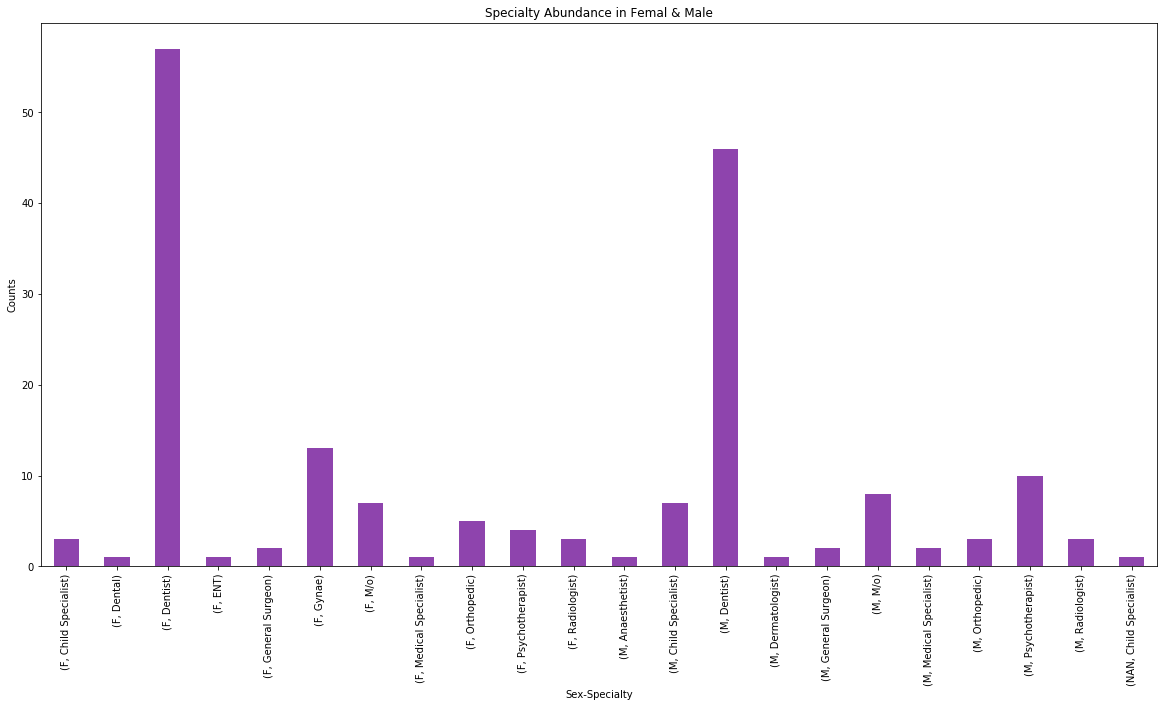

In [138]:
# We can see from above results that Dentist is abundance in both Female and Male

#Lets plot a graph 
g1 = group_data.plot(kind='bar',figsize=(20, 10),color = '#8E44AD',title="Specialty Abundance in Femal & Male") 
g1.set_xlabel('Sex-Specialty')
g1.set_ylabel('Counts')

# Q6. Which Doctor is earning highest?

In [139]:
#So we will replace garbage with NaN

hfd.TotalCharges = hfd.TotalCharges.replace('Cancelled',np.nan)

#We convert TotalCharges column to numeric
hfd['TotalCharges'] =pd.to_numeric(hfd.TotalCharges,errors='coerce')
#Now we are good to go

docEarn = hfd[['ConsultingDoctor','TotalCharges']].copy()
docEarn = docEarn.groupby('ConsultingDoctor').sum().sort_values(by='TotalCharges',ascending=False)

docEarn.head()

,TotalCharges
ConsultingDoctor,
Dr Alaf Khan,513050.0
Dr Kinza Alam,76700.0
Dr Saad,52000.0
Dr Ali,26100.0
Dr Fakiha,22600.0


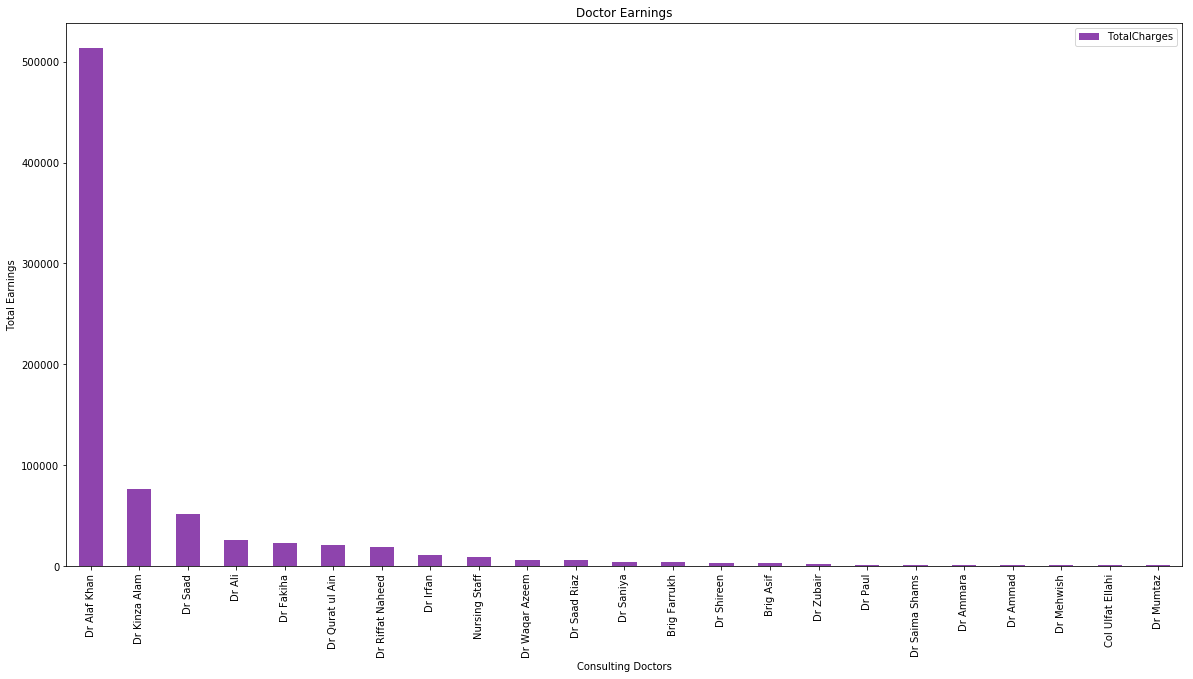

In [140]:
#As we can see, Dr Alaf Khan is on top of the lists in earning
#Now, lets plot that
g1 = docEarn.plot(kind='bar',figsize=(20,10),color='#8E44AD',title="Doctor Earnings")
g1.set_xlabel('Consulting Doctors')
g1.set_ylabel('Total Earnings')

# Q7. Which procedure type earns more money?

In [141]:
procEarn = hfd[['Procedure','TotalCharges']].copy()
procEarn = procEarn.groupby('Procedure').sum().sort_values(by='TotalCharges',ascending=False)
# procEarn = procEarn.reset_index()
procEarn.head(n=1)

,TotalCharges
Procedure,
Orthodontics,240000.0


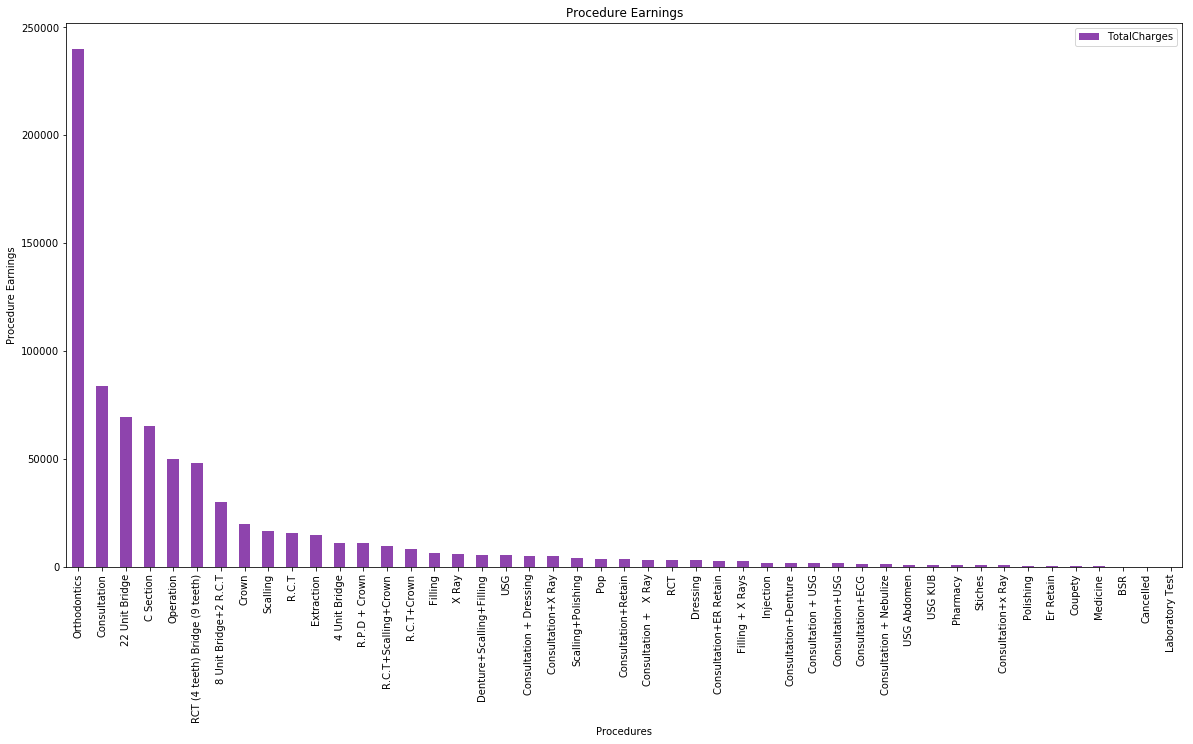

In [142]:
#We see orthodontics has the highest earnings
#lets plot these results
g = procEarn.plot(kind='bar',figsize=(20,10),color='#8E44AD',title='Procedure Earnings')
g.set_xlabel('Procedures')
g.set_ylabel('Procedure Earnings')

# Q8. Which time of the day has highest frequency of visits by hour?

In [143]:
# Replaacing '-' with NaN
hfd.Time = hfd.Time.replace('-',np.nan)
# Now we convert Time to standard time
hfd.Time = pd.to_datetime(hfd.Time,format = '%I:%M%p')
hfd['Hour'] =hfd.Time.dt.hour

In [144]:
#Now we groupby Hour
vh = hfd[['Hour']].copy()
vh['Visits']=0
vh = vh.groupby(['Hour']).agg({'Visits':"count"})
vh = vh.sort_values(by=['Visits'],ascending=False)
print "The time with highets frequency: ";
vh.head(n=1)

The time with highets frequency: 


,Visits
Hour,
13.0,29


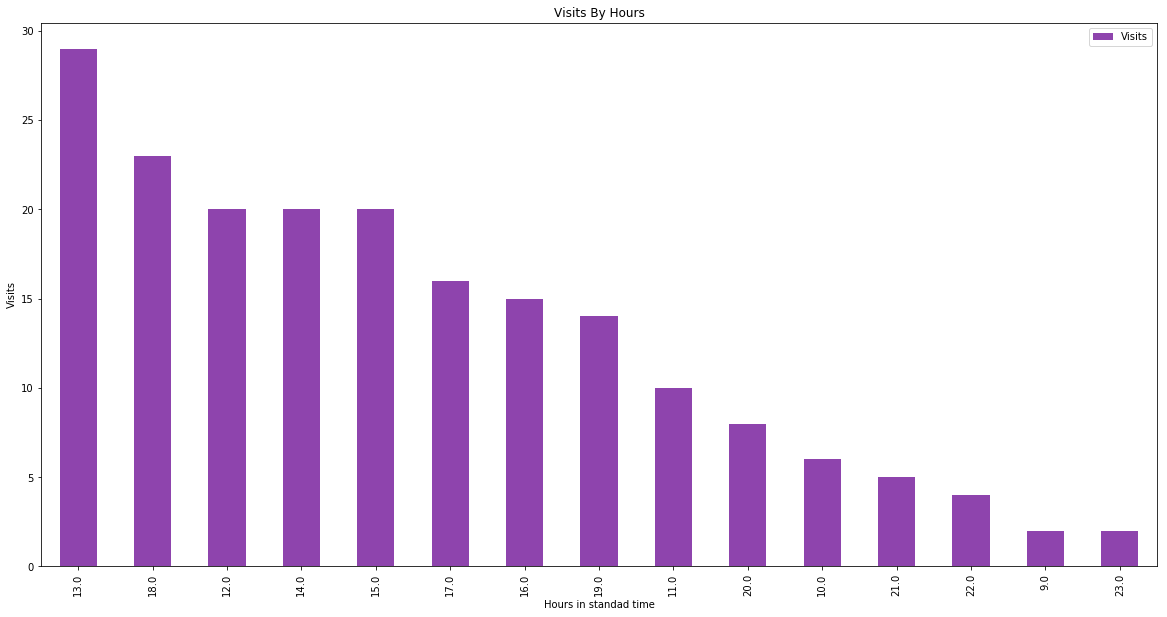

In [145]:
#So we can see, 1:00pm (13:00 Standard Time) 
#lets plot this

g = vh.plot(kind='bar',figsize=(20,10),color='#8E44AD',title='Visits By Hours')
g.set_xlabel('Hours in standad time')
g.set_ylabel('Visits')

# Q9. Create a bracket of time?

In [174]:
#First converting the Hour column to numeric type
hfd['Hour'] = pd.to_numeric(hfd.Hour,errors='coerce')

def getBracket(time):
    d = pd.to_datetime(time)
    if time >=pd.to_datetime('1900-01-01 06:00:00') and time <=pd.to_datetime('1900-01-01 12:00:00'):
        return 'Morning'
    elif time >=pd.to_datetime('1900-01-01 12:00:00') and time <=pd.to_datetime('1900-01-01 16:00:00'):
        return 'Afternoon'
    elif time >=pd.to_datetime('1900-01-01 16:00:00') and time <=pd.to_datetime('1900-01-01 19:00:00'):
        return 'Evening'
    elif (time >=pd.to_datetime('1900-01-01 19:00:00') and time <=pd.to_datetime('1900-01-01 23:00:00'))or(time >=pd.to_datetime('1900-01-01 00:00:00') and time <=pd.to_datetime('1900-01-01 06:00:00')):
        return 'Evening'

    
#Now creating another column
mask = (hfd.Hour.notnull())

hfd['Bracket'] = hfd[mask].apply(lambda x: getBracket(x['Time']),axis=1)

hfd[['Time','Hour','Bracket']].head()

,Time,Hour,Bracket
0,1900-01-01 11:00:00,11.0,Morning
1,1900-01-01 10:45:00,10.0,Morning
2,1900-01-01 12:38:00,12.0,Afternoon
3,1900-01-01 13:00:00,13.0,Afternoon
4,1900-01-01 14:45:00,14.0,Afternoon


# Q10. How many patients are repeated visitors?

In [147]:
reppat = hfd[['id']].copy()
reppat['Visits']=0
reppat = reppat.groupby(['id']).agg({'Visits':"count"})
reppat = reppat.loc[reppat['Visits']>1]
reppat = reppat.reset_index()

print "No of patients with repeatedd visits: "+str(reppat.id.count())

No of patients with repeatedd visits: 37


# Q11. Give us the id of repeated visitors?

In [148]:
print reppat['id'].tolist()

[1L, 4L, 12L, 13L, 17L, 20L, 25L, 40L, 45L, 46L, 59L, 63L, 64L, 80L, 88L, 94L, 96L, 97L, 100L, 101L, 107L, 109L, 112L, 114L, 116L, 118L, 120L, 122L, 130L, 132L, 133L, 140L, 145L, 149L, 150L, 151L, 153L]


# Q12. Which patients visited again for the same problem?

In [149]:
reppat = hfd[['id','Specialty']].copy()
reppat['Visits']=1
reppat =  reppat.groupby(['id','Specialty']).agg({'Visits':"count"})
reppat = reppat.loc[reppat['Visits']>1]
print (reppat)

                     Visits
id  Specialty              
12  Dentist               2
13  Orthopedic            2
17  Dentist               2
25  Gynae                 2
40  Dentist               2
45  Dentist               3
63  Dentist               2
88  Dentist               2
96  Dentist               2
97  Psychotherapist       2
100 Dentist               2
101 Gynae                 3
107 Dentist               2
109 Dentist               3
112 Orthopedic            2
114 Gynae                 3
116 Dentist               2
120 M/o                   2
130 Psychotherapist       2
132 Dentist               3
140 Dentist               4
145 Dentist               3
149 Dentist               2
151 Dentist               2
153 Dentist               2


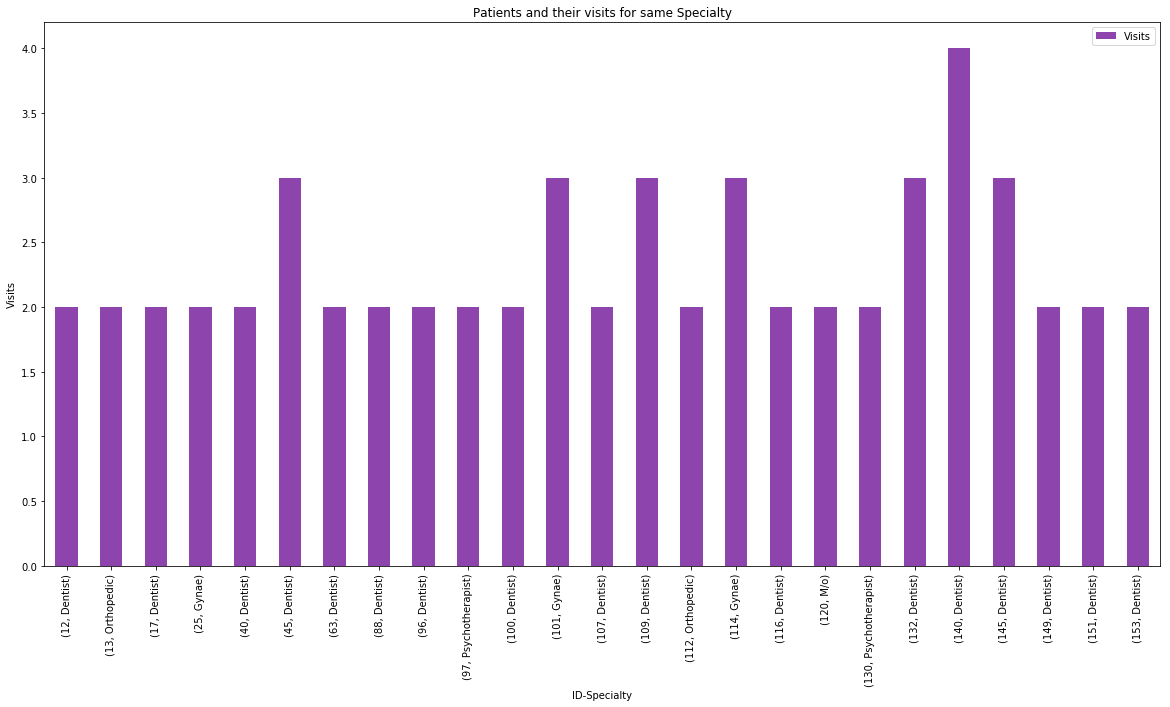

In [150]:
#Lets plot it
g = reppat.plot(kind='bar',figsize=(20,10),color='#8E44AD',title='Patients and their visits for same Specialty')
g.set_xlabel('ID-Specialty')
g.set_ylabel('Visits')

# Q13. What is the median age for Females and Males?

In [151]:
medAge = hfd[['Sex','Age']].copy()
medAge = medAge.groupby(['Sex'])['Age'].apply(np.nanmedian)  #Group sex, and apply median on age
print "Median ages are: "
medAge

Median ages are: 


Sex
F      30.0
M      29.0
NAN     NaN
Name: Age, dtype: float64

# Q14. What is the total amount in balance?

In [152]:
hfd.AmountBalance = hfd.AmountBalance.replace(',','',regex=True)
hfd.AmountBalance = pd.to_numeric(hfd.AmountBalance,errors='coerce')

amountBalance = hfd.AmountBalance.sum()
print "Amount in balance is:"+str(amountBalance) #222500

Amount in balance is:222500.0


# Q15. How much money was made by Procedure Type “Consultation”?

In [153]:
hfd.TotalCharges = pd.to_numeric(hfd.TotalCharges,errors='coerce')
consEarn = hfd[['Procedure','TotalCharges']].copy()
consEarn = consEarn.loc[consEarn['Procedure']=='Consultation']
consEarn = consEarn.groupby('Procedure').sum()
consEarn = consEarn.reset_index()
print "Consultation made :"
consEarn

Consultation made :


,Procedure,TotalCharges
0,Consultation,83950.0


# Q16. Is there a relation between Age and Total Charges paid?

In [154]:
hfd.Age = pd.to_numeric(hfd.Age,errors='coerce')
hfd.TotalCharges = pd.to_numeric(hfd.TotalCharges,errors='coerce')
cor = hfd.Age.corr(hfd.TotalCharges)
print "Age and TotalCharges have correlation value of: "+str(cor)
# corr value = 0.02, Which is a weak positive relation. 

Age and TotalCharges have correlation value of: 0.028090455626


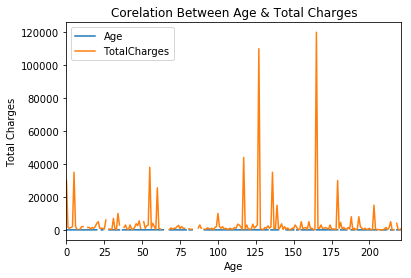

In [155]:
#Plotting correlation
cor = hfd[['Age','TotalCharges']].copy()
g = cor.plot(kind='line',fig=(20,10),title='Corelation Between Age & Total Charges')
g.set_xlabel('Age')
g.set_ylabel('Total Charges')

# Q17. Which Age group had highest number of visits?

In [156]:
ageVisits = hfd[['Age']].copy()
ageVisits = ageVisits.groupby(['Age']).Age.count()
AgeList = ageVisits.index.tolist()
VisitList = ageVisits.tolist()
indexmaxVisits = np.argmax(VisitList)
print "Age:"+str(AgeList[indexmaxVisits])+" has max visits of :"+str(VisitList[indexmaxVisits])

Age:30.0 has max visits of :20


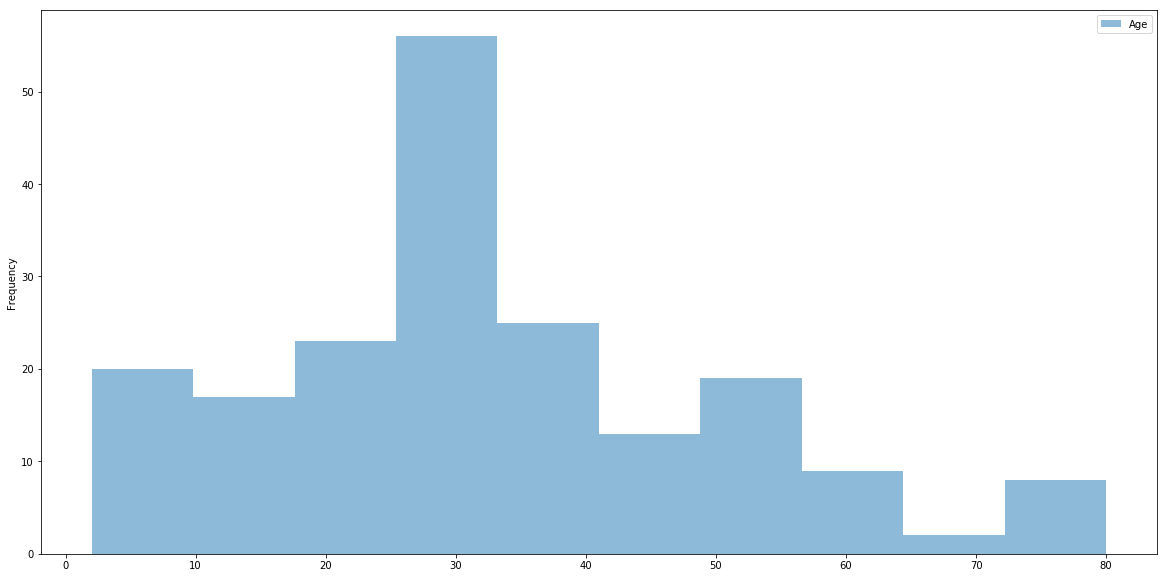

In [157]:
# To visualize in Groups
ageVisits = hfd[['Age']].copy()
ageVisits.plot.hist(alpha=0.5,figsize=(20,10))

# Q18. What is the total cost earned by Procedure Type X Ray and Scalling together?

In [158]:
xsEarn = hfd[['Procedure','TotalCharges']].copy()
xsEarn = xsEarn.loc[(xsEarn['Procedure']=='X Ray') | (xsEarn['Procedure']=='Scalling')]
xsEarn = xsEarn.groupby('Procedure').sum().sort_values(by='TotalCharges')
# xsEarn = xsEarn.reset_index()
xsEarn

,TotalCharges
Procedure,
X Ray,5800.0
Scalling,16500.0


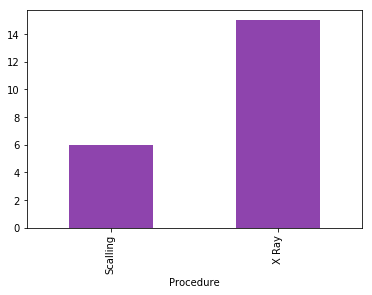

In [159]:
#Scalling = 16500, X Ray=5800

#Lets try to understand something, lets count the no of procedure for scalling and xray
xs = hfd[['Procedure']].copy()
xs = xs.loc[(xs['Procedure']=='X Ray') | (xs['Procedure']=='Scalling')]
xs = xs.groupby('Procedure').Procedure.count()
xs.plot(kind='bar',color='#8E44AD')

In [160]:
#Lets us now extract the  earnin of ach procedure from procedure with multiple values like scalling+rct etc

In [161]:
def getValue(x):
    if 'X Ray' in x:
        return 'X Ray'
    elif 'Scalling' in x:
        return 'Scalling'
    
def getCharges(x):
    if x=='X Ray':
        return 300
    elif x=='Scalling':
        return 3000


           TotalCharges
Procedure              
X Ray            8200.0
Scalling        28500.0


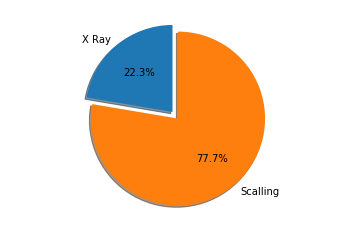

In [162]:
xsEarn2 = hfd[['Procedure','TotalCharges']].copy()

xsEarn2 = xsEarn2[((xsEarn2['Procedure'].str.contains("X Ray")==True)|(xsEarn2['Procedure'].str.contains("Scalling")==True))&(xsEarn2['Procedure'].str.len()>10)]
xsEarn2['Procedure'] = xsEarn2['Procedure'].apply(lambda x: getValue(x))
xsEarn2['TotalCharges'] = xsEarn2['Procedure'].apply(lambda x: getCharges(x))
xsEarn2 = xsEarn2.groupby('Procedure').sum().sort_values(by='TotalCharges')
# xsEarn2 = xsEarn2.reset_index()
tEarn = [xsEarn, xsEarn2]
tEarn = pd.concat(tEarn)

tEarn= tEarn.reset_index()
tEarn = tEarn.groupby('Procedure').sum().sort_values(by='TotalCharges')
# tEarn = tEarn.reset_index()
print tEarn

#Lets make it more visible
axis('equal');
explode = (0.1, 0)
pie(tEarn, explode=explode, labels=tEarn.index,autopct='%1.1f%%',shadow=True, startangle=90);
show()

In [48]:
hfd.to_csv('Cleaned-HospData.csv', sep=',')